# Movie Analysis

> Business Problem: Microsoft has decided to create a new movie studio. Microsoft wants to know what types of films are currently doing the best at the box office to help decide what type of films to create.

## Load Data and Packages

In [1]:
# importing packages
import pandas as pd
# setting pandas display to avoid scientific notation
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

In [2]:
# Load Files into data frames
# Contains movie info and genres imdb's website
df_titles = pd.read_csv('data/imdb.title.basics.csv.gz')
# Contains ratings and numvotes from imbd's website
df_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz')
# Contains budget and revenue info
df_budget = pd.read_csv('data/tn.movie_budgets.csv.gz')

## Data Exploration
>Explore data in each file. Before we can develop a plan for our analysis we must understand our data. Exploring our data will help us decide what questions we can ask in our analysis and what steps need to be taken to prepare the data for analysis.
- Understand contents of each column
- Understand data types of each column
- Understand basic statistics of each dataframe




In [3]:
df_titles.head(14)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.00,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,nan,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.00,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,nan,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.00,Biography


In [4]:
df_titles.describe()

,start_year,runtime_minutes
count,146144.00,114405.00
mean,2014.62,86.19
std,2.73,166.36
min,2010.00,1.00
25%,2012.00,70.00
50%,2015.00,87.00
75%,2017.00,99.00
max,2115.00,51420.00


In [5]:
df_titles.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

In [6]:
df_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21


In [7]:
df_ratings.describe()

,averagerating,numvotes
count,73856.00,73856.00
mean,6.33,3523.66
std,1.47,30294.02
min,1.00,5.00
25%,5.50,14.00
50%,6.50,49.00
75%,7.40,282.00
max,10.00,1841066.00


In [8]:
df_ratings.dtypes

tconst            object
averagerating    float64
numvotes           int64
dtype: object

In [9]:
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [10]:
df_budget.describe()

,id
count,5782.00
mean,50.37
std,28.82
min,1.00
25%,25.00
50%,50.00
75%,75.00
max,100.00


In [11]:
df_budget.dtypes


id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

## Data Preparation

### Preparation to dos:
- df_title
 - Reassign movies to all related genres

 
- df_ratings
 - Merge df_titles and df_ratings into the same df --> df_imbd
 
- df_budget
 - Convert budget and gross numbers to float so they can be manipulated as a number
 - Create a profit column
 - Create profit margin column
 - Create separate column for release year
 - Merge df_budget with df_imbd (the merged titles and ratings df)


 
### Future Analysis Goals: 
- Avg rating by genre
- Avg # of reviews by genre
- Percent of movie titles produced by genre
- profit by genre
- profit margin by genre



In [12]:
#Convert budget and gross columns to floats in df_budget
my_cols = ['production_budget','domestic_gross','worldwide_gross']
for i in my_cols:
    df_budget[i] = df_budget[i].str.replace('$','')\
                                .str.replace(',','')\
                                .astype(float)
#Convert release_date to date
df_budget['release_date'] = pd.to_datetime(df_budget['release_date'])
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.00,760507625.00,2776345279.00
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00
2,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.00,0.00,0.00
5778,79,1999-04-02,Following,6000.00,48482.00,240495.00
5779,80,2005-07-13,Return to the Land of Wonders,5000.00,1338.00,1338.00
5780,81,2015-09-29,A Plague So Pleasant,1400.00,0.00,0.00


In [13]:
#Add worldwide_profit and worldwide_profit_margin cols
df_budget['worldwide_profit'] = df_budget['worldwide_gross'] - df_budget['production_budget']
df_budget['worldwide_profit_margin'] = df_budget['worldwide_profit'] / df_budget['worldwide_gross']
#Add year col
df_budget['year'] = df_budget['release_date'].dt.year
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,worldwide_profit_margin,year
0,1,2009-12-18,Avatar,425000000.00,760507625.00,2776345279.00,2351345279.00,0.85,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,635063875.00,0.61,2011
2,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00,-200237650.00,-1.34,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,1072413963.00,0.76,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00,999721747.00,0.76,2017
...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.00,0.00,0.00,-7000.00,-inf,2018
5778,79,1999-04-02,Following,6000.00,48482.00,240495.00,234495.00,0.98,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000.00,1338.00,1338.00,-3662.00,-2.74,2005
5780,81,2015-09-29,A Plague So Pleasant,1400.00,0.00,0.00,-1400.00,-inf,2015


In [14]:
#Float error when using make_genre_columns function so made sure everything in genres was a string
df_titles['genres'] = df_titles['genres'].astype(str)

In [15]:
def make_genre_columns(dataframe, genre_col_name='genres', drop_genres_col=True):
    '''Creates a new DataFrame of a column for each genres from the genres column. 
    Input:
        dataframe: Original DataFrame
        genres_col_name: Name of the column of genres (values look like "Action,Adventure")
        drop_genres_col: Flag to drop the original genres column
    Returns:
        A copy of the original DataFrame with a column for each genres from the genres column
    '''
    ## Get list of unique genres
    # Join all the (unique) genres values into one big string
    list_all_genres = ','.join(dataframe[genre_col_name].unique())
    # Get a set of all unique genres (no duplicates)
    unique_genres = set(list_all_genres.split(','))
    ## Create new columns with the genres & populate with 0 & 1
    # Make a safe copy
    new_dataframe = dataframe.copy(deep=True)
    for genre in unique_genres:
        new_dataframe[genre] = new_dataframe[genre_col_name].map(lambda val: 1 if genre in val else 0)
    # Drop the unused `genre_col_name` column
    if drop_genres_col:
        new_dataframe = new_dataframe.drop([genre_col_name], axis=1)
    return new_dataframe

In [16]:
#Run df_titles through make_genre_columns function
df_titles_new = make_genre_columns(df_titles)
df_titles_new.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,Musical,History,Action,News,Reality-TV,...,Thriller,Sport,Biography,nan,Romance,War,Western,Adult,Drama,Family
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
#Create a uniqe list of all genres
list_all_genres = ','.join(df_titles['genres'].unique())
unique_genres = list(set(list_all_genres.split(',')))
print(unique_genres)

['Musical', 'History', 'Action', 'News', 'Reality-TV', 'Comedy', 'Music', 'Talk-Show', 'Mystery', 'Adventure', 'Game-Show', 'Sci-Fi', 'Horror', 'Short', 'Crime', 'Documentary', 'Fantasy', 'Animation', 'Thriller', 'Sport', 'Biography', 'nan', 'Romance', 'War', 'Western', 'Adult', 'Drama', 'Family']


In [18]:
#Merge df_titles_new with df_ratings
df_imbd = df_titles_new.merge(df_ratings, left_on='tconst', right_on='tconst')
df_imbd.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,Musical,History,Action,News,Reality-TV,...,Biography,nan,Romance,War,Western,Adult,Drama,Family,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,0,0,1,0,0,...,0,0,0,0,0,0,1,0,7.00,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,0,0,0,0,0,...,1,0,0,0,0,0,1,0,7.20,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,0,0,0,0,0,...,0,0,0,0,0,0,1,0,6.90,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,0,0,0,0,0,...,0,0,0,0,0,0,1,0,6.10,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,0,0,0,0,0,...,0,0,0,0,0,0,1,0,6.50,119


In [19]:
# Merge df_budget with df_imbd
df_imbd_budget = df_budget.merge(df_imbd, left_on=['movie','year'], right_on=['primary_title','start_year'],    how="inner",
)
df_imbd_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,worldwide_profit_margin,year,tconst,...,Biography,nan,Romance,War,Western,Adult,Drama,Family,averagerating,numvotes
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,635063875.00,0.61,2011,tt1298650,...,0,0,0,0,0,0,0,0,6.60,447624
1,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00,-200237650.00,-1.34,2019,tt6565702,...,0,0,0,0,0,0,0,0,6.00,24451
2,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,1072413963.00,0.76,2015,tt2395427,...,0,0,0,0,0,0,0,0,7.30,665594
3,7,2018-04-27,Avengers: Infinity War,300000000.00,678815482.00,2048134200.00,1748134200.00,0.85,2018,tt4154756,...,0,0,0,0,0,0,0,0,8.50,670926
4,9,2017-11-17,Justice League,300000000.00,229024295.00,655945209.00,355945209.00,0.54,2017,tt0974015,...,0,0,0,0,0,0,0,0,6.50,329135


In [20]:
df_imbd.count() 

tconst             73856
primary_title      73856
original_title     73856
start_year         73856
runtime_minutes    66236
Musical            73856
History            73856
Action             73856
News               73856
Reality-TV         73856
Comedy             73856
Music              73856
Talk-Show          73856
Mystery            73856
Adventure          73856
Game-Show          73856
Sci-Fi             73856
Horror             73856
Short              73856
Crime              73856
Documentary        73856
Fantasy            73856
Animation          73856
Thriller           73856
Sport              73856
Biography          73856
nan                73856
Romance            73856
War                73856
Western            73856
Adult              73856
Drama              73856
Family             73856
averagerating      73856
numvotes           73856
dtype: int64

In [21]:
df_budget.count()

id                         5782
release_date               5782
movie                      5782
production_budget          5782
domestic_gross             5782
worldwide_gross            5782
worldwide_profit           5782
worldwide_profit_margin    5782
year                       5782
dtype: int64

In [22]:
df_imbd_budget.count()

id                         1498
release_date               1498
movie                      1498
production_budget          1498
domestic_gross             1498
worldwide_gross            1498
worldwide_profit           1498
worldwide_profit_margin    1498
year                       1498
tconst                     1498
primary_title              1498
original_title             1498
start_year                 1498
runtime_minutes            1490
Musical                    1498
History                    1498
Action                     1498
News                       1498
Reality-TV                 1498
Comedy                     1498
Music                      1498
Talk-Show                  1498
Mystery                    1498
Adventure                  1498
Game-Show                  1498
Sci-Fi                     1498
Horror                     1498
Short                      1498
Crime                      1498
Documentary                1498
Fantasy                    1498
Animatio

In [23]:
# Number of records lost in df_budget and df_imbd merge
5782 - 1498

4284

In [24]:
# Percent of records lost in df_budget and df_imbd merge
(5782 - 1498)/5782

0.7409200968523002

## Data Analysis

### Analysis Goals:
- Avg rating by genre
- Avg # of reviews by genre
- profit by genre
- profit margin by genre

In [25]:
# Create a df with summary statistics grouped by genre for percent of titles and ratings
column_names=['genre','mean_rating', 'count_titles', 'avg_num_votes', 'avg_runtime','avg_year']
my_dict = {}
i = 0
for genre in unique_genres:
    df_genre = df_imbd[df_imbd[genre] == 1]
    m = df_genre['averagerating'].mean()
    c = df_genre['tconst'].count()
    d = df_genre['numvotes'].mean()
    t = df_genre['runtime_minutes'].mean()
    y = df_genre['start_year'].mean()

    my_dict[i] = [genre, m,c,d,t,y]
    i = i +1

print(my_dict)
df_summary = pd.DataFrame.from_dict(my_dict, orient='index',
                       columns=column_names)



{0: ['Musical', 6.498335644937577, 721, 1925.0554785020804, 104.36990595611286, 2014.0277392510402], 1: ['History', 7.040955752212392, 2825, 2776.4067256637168, 92.60502958579882, 2013.873982300885], 2: ['Action', 5.810360618202613, 6988, 14476.485689753863, 104.00317611561061, 2014.2819118488837], 3: ['News', 7.2713298791018985, 579, 212.98618307426597, 78.27130434782609, 2013.062176165803], 4: ['Reality-TV', 6.499999999999999, 17, 27.0, 76.0, 2014.1176470588234], 5: ['Comedy', 6.002689415847302, 17290, 4297.617408906883, 97.212388810107, 2014.2533256217466], 6: ['Music', 6.930521936459925, 2644, 2524.3343419062026, 96.05086136177195, 2013.9364599092285], 7: ['Talk-Show', nan, 0, nan, nan, nan], 8: ['Mystery', 5.920401447844683, 3039, 8113.618295491938, 95.19522326064381, 2014.4169134583744], 9: ['Adventure', 6.196201205134906, 3817, 22067.74665968038, 93.77133388566695, 2014.3031176316479], 10: ['Game-Show', 7.3, 2, 1734.5, 117.0, 2015.0], 11: ['Sci-Fi', 5.4897552130552985, 2206, 194

In [26]:
# Add percent_titles column
df_summary['percent_titles'] =1.0*df_summary['count_titles']/df_summary['count_titles'].sum()

In [27]:
df_summary

,genre,mean_rating,count_titles,avg_num_votes,avg_runtime,avg_year,percent_titles
0,Musical,6.50,721,1925.06,104.37,2014.03,0.01
1,History,7.04,2825,2776.41,92.61,2013.87,0.02
2,Action,5.81,6988,14476.49,104.00,2014.28,0.05
3,News,7.27,579,212.99,78.27,2013.06,0.00
4,Reality-TV,6.50,17,27.00,76.00,2014.12,0.00
5,Comedy,6.00,17290,4297.62,97.21,2014.25,0.13
6,Music,6.93,2644,2524.33,96.05,2013.94,0.02
7,Talk-Show,nan,0,nan,nan,nan,0.00
8,Mystery,5.92,3039,8113.62,95.20,2014.42,0.02
9,Adventure,6.20,3817,22067.75,93.77,2014.30,0.03


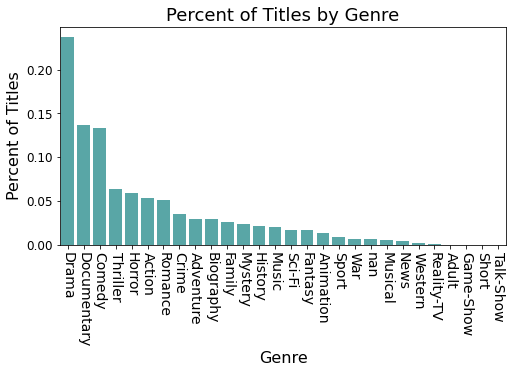

In [28]:
#Create visualization for percent of titles by genre
df_graph = df_summary.sort_values(by=['percent_titles'],ascending = False)
plt.figure(figsize=(8,4))
sns.barplot(data=df_graph, x='genre',y='percent_titles', color="aqua", saturation=.3)
plt.title('Percent of Titles by Genre', fontsize=18)
plt.ylabel('Percent of Titles', fontsize=16)
plt.xlabel('Genre', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=-90);

- Genres with most titles:
    1. Drama
    2. Documentary
    3. Comedy
    
    
- We can see from our visualization that our competitors primarily produce films associated with the Drama genre. About 24% of all films examined can be associated with the Drama genre. In second and third place are Documentary and Comedy at around 13-14% each. These three genres dominate all other genres; altogether they account for about half of all films produced.


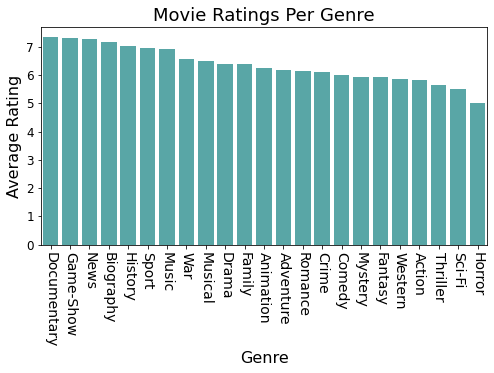

In [29]:
#Create a visualization for movie ratings by genre
df_graph = df_summary[df_summary['avg_num_votes']> 100].sort_values(by=['mean_rating'],ascending = False)
plt.figure(figsize=(8,4))
sns.barplot(data=df_graph, x='genre',y='mean_rating', color="aqua", saturation=.3)
plt.title('Movie Ratings Per Genre', fontsize=18)
plt.ylabel('Average Rating', fontsize=16)
plt.xlabel('Genre', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=-90);

- Genres with highest ratings:
    1. Documentary
    2. Game-show
    3. News
- Viewer ratings per genre are very similar with the exception of a slightly lower rating for Westerns. There could be a selection bias here because only individuals which have already decided they want to watch a certain genre will provide a rating.
- The only top three genre which overlaps with the top 3 produced genres is Documentary.

In [30]:
# Create a df with summary statistics grouped by genre for buget, profit, and imbd data
column_names_2=['genre','count_of_titles','avg_year', 
                'avg_runtime_minutes', 'avg_rating', 'median_production_budget', 
                'median_worldwide_profit', 'median_worldwide_profit_margin']
my_dict_2 = {}
i = 0
for genre in unique_genres:
    df_genre = df_imbd_budget[df_imbd_budget[genre] == 1]

    my_dict_2[i] = [genre, 
                  df_genre['primary_title'].count(),
                  df_genre['start_year'].mean(),
                  df_genre['runtime_minutes'].mean(),
                  df_genre['averagerating'].mean(),
                  df_genre['production_budget'].median(),
                  df_genre['worldwide_profit'].median(),
                  df_genre['worldwide_profit_margin'].median()
                 ]
    i = i +1

print(my_dict_2)
df_summary_2 = pd.DataFrame.from_dict(my_dict_2, orient='index',
                       columns=column_names_2)


{0: ['Musical', 9, 2012.7777777777778, 115.11111111111111, 6.0777777777777775, 55000000.0, 35552675.0, 0.3926187161229638], 1: ['History', 39, 2015.051282051282, 124.12820512820512, 6.946153846153848, 25000000.0, 20044909.0, 0.4650659499862768], 2: ['Action', 447, 2014.0671140939598, 112.0648769574944, 6.2436241610738215, 58000000.0, 52737201.0, 0.5275347871085762], 3: ['News', 0, nan, nan, nan, nan, nan, nan], 4: ['Reality-TV', 0, nan, nan, nan, nan, nan, nan], 5: ['Comedy', 514, 2013.5875486381324, 102.53424657534246, 6.194747081712068, 25500000.0, 29484039.0, 0.5721417910341198], 6: ['Music', 56, 2013.642857142857, 110.17857142857143, 6.3214285714285685, 15000000.0, 11938819.5, 0.5418963748040291], 7: ['Talk-Show', 0, nan, nan, nan, nan, nan, nan], 8: ['Mystery', 126, 2014.126984126984, 105.91269841269842, 6.103968253968255, 12000000.0, 33547637.5, 0.6907233771593373], 9: ['Adventure', 350, 2014.2485714285715, 111.13753581661891, 6.44257142857143, 100000000.0, 128795727.0, 0.6198683

In [31]:
# Add percent_titles column
df_summary_2['percent_titles'] =1.0*df_summary_2['count_of_titles']/df_summary_2['count_of_titles'].sum()

In [32]:
df_summary_2

,genre,count_of_titles,avg_year,avg_runtime_minutes,avg_rating,median_production_budget,median_worldwide_profit,median_worldwide_profit_margin,percent_titles
0,Musical,9,2012.78,115.11,6.08,55000000.00,35552675.00,0.39,0.00
1,History,39,2015.05,124.13,6.95,25000000.00,20044909.00,0.47,0.01
2,Action,447,2014.07,112.06,6.24,58000000.00,52737201.00,0.53,0.12
3,News,0,nan,nan,nan,nan,nan,nan,0.00
4,Reality-TV,0,nan,nan,nan,nan,nan,nan,0.00
5,Comedy,514,2013.59,102.53,6.19,25500000.00,29484039.00,0.57,0.13
6,Music,56,2013.64,110.18,6.32,15000000.00,11938819.50,0.54,0.01
7,Talk-Show,0,nan,nan,nan,nan,nan,nan,0.00
8,Mystery,126,2014.13,105.91,6.10,12000000.00,33547637.50,0.69,0.03
9,Adventure,350,2014.25,111.14,6.44,100000000.00,128795727.00,0.62,0.09


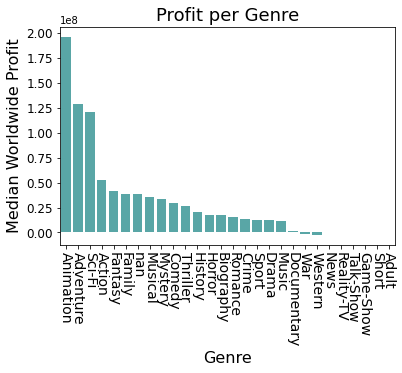

In [33]:
df_graph = df_summary_2.sort_values(by=['median_worldwide_profit'],ascending = False)
sns.barplot(data=df_graph, x="genre", y="median_worldwide_profit", color='aqua',saturation=.3)
plt.title('Profit per Genre', fontsize=18)
plt.ylabel('Median Worldwide Profit', fontsize=16)
plt.xlabel('Genre', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=-90);


- Do commonly produced genres earn higher profits? 

    - Genres with highest ratings:
        1. Documentary
        2. Game-show
        3. News
    - Genres with most profit:
        1. Animation
        2. Adventure
        3. Sci-Fi
- The 3 genres associated with half of all titles produced are nowhere in the top three earning genres.


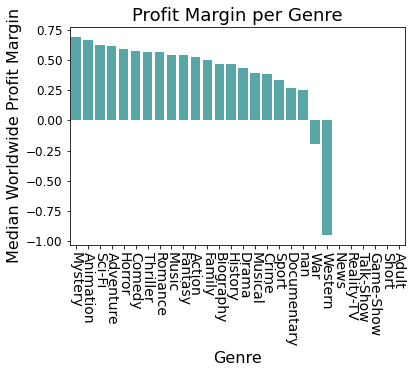

In [34]:
df_graph = df_summary_2.sort_values(by=['median_worldwide_profit_margin'],ascending = False)
sns.barplot(data=df_graph, x="genre", y="median_worldwide_profit_margin", color='aqua',saturation=.3)
plt.title('Profit Margin per Genre', fontsize=18)
plt.ylabel('Median Worldwide Profit Margin', fontsize=16)
plt.xlabel('Genre', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=-90);


- The 3 genres associated with half of all titles produced are nowhere in the genres which have the best profit margin either.
    - Genres with highest ratings:
        1. Documentary
        2. Game-show
        3. News
    - Genres with most profit margin:
        1. Mystery
        2. Animation
        3. Sci-Fi


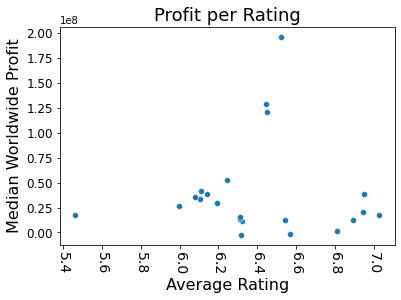

In [35]:
#Visualize profit per average genre rating
df_graph = df_summary_2.sort_values(by=['avg_rating'],ascending = False)
sns.scatterplot(data=df_graph, x="avg_rating", y="median_worldwide_profit")
#                 color='aqua', saturation=.3)
plt.title('Profit per Rating', fontsize=18)
plt.ylabel('Median Worldwide Profit', fontsize=16)
plt.xlabel('Average Rating', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=-90);


- Do highly rated genres earn higher profits?
    - Genres with highest ratings:
        1. Documentary
        2. Game-show
        3. News
    - Genres with most profit:
        1. Animation
        2. Adventure
        3. Sci-Fi

- The 3 genres which received the highest average rating are not part of the top 3 earning genres.

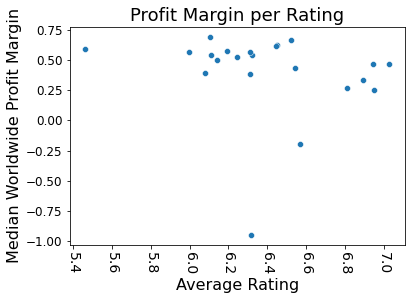

In [36]:
#Visualize profit margin vs avegage genre rating
df_graph = df_summary_2.sort_values(by=['avg_rating'],ascending = False)
sns.scatterplot(data=df_graph, x="avg_rating", y="median_worldwide_profit_margin")
plt.title('Profit Margin per Rating', fontsize=18)
plt.ylabel('Median Worldwide Profit Margin', fontsize=16)
plt.xlabel('Average Rating', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=-90);


- Do highly rated genres have better margins?
    - Genres with highest ratings:
        1. Documentary
        2. Game-show
        3. News
    - Genres with most profit margin:
        1. Mystery
        2. Animation
        3. Sci-Fi
- The 3 genres which received the highest average rating are not part of the genres with top 3 margins.

<AxesSubplot:title={'center':'Ratings to Profit'}, xlabel='Median Worldwide Profit', ylabel='Avg Rating'>

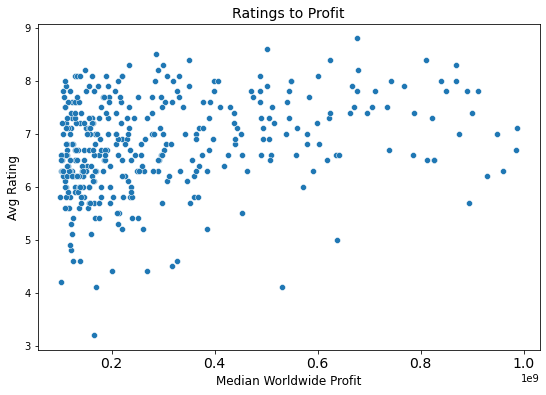

In [37]:
# Just because our top 3 didn't align doesn't mean there is no overall pattern.
# Create scatter visualization for rating vs profit to further visualize correlation. 
plt.figure(figsize=(9,6))
plt.title('Ratings to Profit', fontsize=14)
plt.ylabel('Avg Rating', fontsize=12)
plt.xlabel('Median Worldwide Profit', fontsize=12)
plt.xticks(fontsize=14)
sns.scatterplot(data=df_imbd_budget[(df_imbd_budget['worldwide_profit']>100000000) &
                                    (df_imbd_budget['worldwide_profit']<1000000000) 
                                   ], x="worldwide_profit", y="averagerating")


- There doesn't appear to be any correlation between viewer ratings submitted on imbd and profit.
- Further Investigation: Calculate correlation with formula

<AxesSubplot:xlabel='avg_rating', ylabel='median_worldwide_profit'>

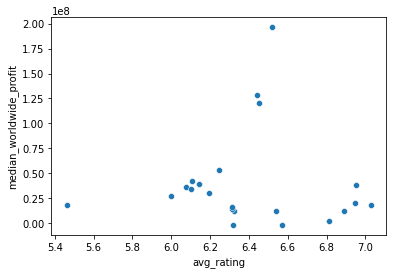

In [38]:
# Additional look at correlation - average ratings by genre vs profit. There doesn't appear to be any correlation
sns.scatterplot(data=df_summary_2, x="avg_rating", y="median_worldwide_profit")


<AxesSubplot:title={'center':'Avg Ratings vs Profit'}, xlabel='Avg Ratings', ylabel='Median Worldwide Profit'>

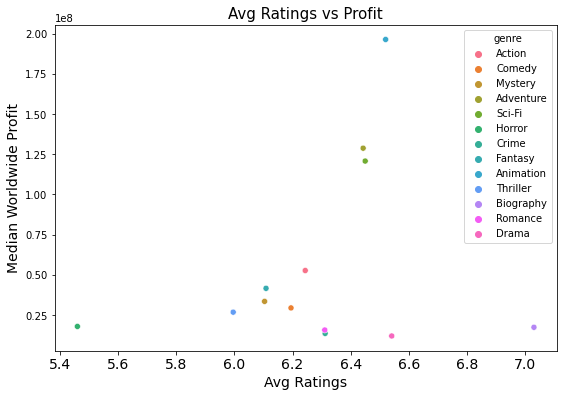

In [39]:
# Create a visualization to show avg rating profit and genre together
plt.figure(figsize=(9,6))
plt.title('Avg Ratings vs Profit', fontsize=15)
plt.ylabel('Median Worldwide Profit', fontsize=14)
plt.xlabel('Avg Ratings', fontsize=14)
plt.xticks(fontsize=14)
sns.scatterplot(data=df_summary_2[df_summary_2['count_of_titles']>100], x="avg_rating", y="median_worldwide_profit", hue = 'genre')


- Genres with most profit:
    1. Animation
    2. Adventure
    3. Sci-Fi
- These three genres stand out in their profits far beyond other genres.
- We can see average ratings by genre are not strongly related to total profits.

<AxesSubplot:title={'center':'Avg Ratings vs Profit Margin'}, xlabel='Avg Ratings', ylabel='Median Worldwide Profit Margin'>

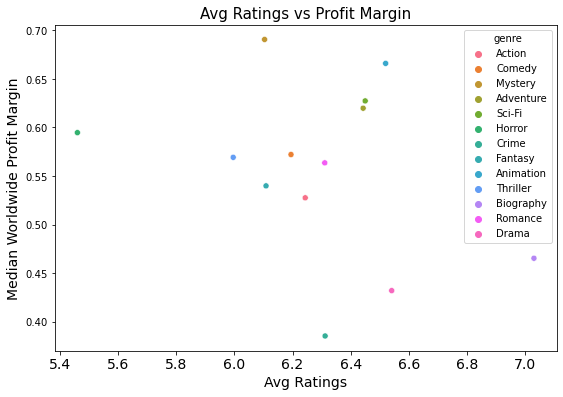

In [40]:
# Create a visualization to show avg rating profit margin and genre together
plt.figure(figsize=(9,6))
plt.title('Avg Ratings vs Profit Margin', fontsize=15)
plt.ylabel('Median Worldwide Profit Margin', fontsize=14)
plt.xlabel('Avg Ratings', fontsize=14)
plt.xticks(fontsize=14)
sns.scatterplot(data=df_summary_2[df_summary_2['count_of_titles']>100], x="avg_rating", y="median_worldwide_profit_margin", hue = 'genre')


- Genres with most profit margin:
    1. Mystery (very low total profits not of interest to Microsoft)
    2. Animation
    3. Sci-Fi
- We can see average ratings by genre are not strongly related to profit margin.


## Summary

### Data Limitations
- Ratings may not be a strong indicator of global profits however we  need to investigate other sources of consumer ratings outside of imdb to confirm.
    - Age distribution of imdb users
    - Country of origin distribution of imdb users

- Percent of titles by genre may not be a strong indicator of global profits however we  need to investigate other sources of movies produced outside of imdb to confirm.
    - Country of origin for movie production







### Further Investigation
- Find other profit data source to expand to more titles
- Calculate Profit by Runtime
- Calculate Average # of reviews by genre
- Explore data outside of imdb
- Calculate correlation coefficient
- Investigate 74% of records lost in budget to imbd merge
    - Are the sample records representative of all the data?


### Conclusions:
- Profits and commonly produced genres:
    No relationship

- Profits and highly rated genres:
    No relationship
    
 - Genres with most profit:
    1. Animation
    2. Adventure
    3. Sci-Fi

### Recommendations:
- Don't produce genres commonly produced by competitors. These genres do not correlate to profit.
- Don't produce genres solely based on viewer ratings. These genres do not correlate to profit.
- According to our current findings, Microsoft should invest in producing animation films since they have the best success globally.



# Extras

<AxesSubplot:xlabel='averagerating', ylabel='worldwide_gross'>

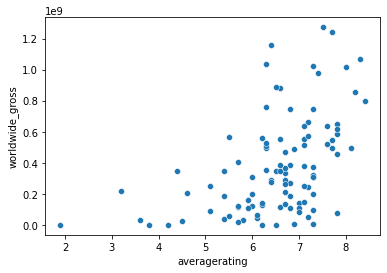

In [41]:
# Scatterplot gross revenue vs average rating by genre
sns.scatterplot(data=df_imbd_budget[df_imbd_budget['Animation']==1], x="averagerating", y="worldwide_gross")

# sns.scatterplot(data=df_imbd_budget[df_imbd_budget['Documentary']==1], x="averagerating", y="worldwide_gross")
# sns.scatterplot(data=df_imbd_budget[df_imbd_budget['Drama']==1], x="averagerating", y="worldwide_gross")
# sns.scatterplot(data=df_imbd_budget[df_imbd_budget['Comedy']==1], x="averagerating", y="worldwide_gross")
